Integrantes:
*   Gabriel Bianchi e Silva - RA: 140399
*   Miguel Silva Taciano - RA: 140756

Neste projeto será desenvolvida uma simulação do funcionamento de uma rede de 500 neurônios, baseando-se no modelo de Van Der Pol com acoplamento, sendo os valores das constantes sugeridas os apresentados durante os slides.

Para o funcionamento do modelo foi criado uma classe, Neurônio, com todas as funções necessárias para o funcionamento de cada um, seguindo o modelo de Van Der Pol. Posteriormente, em um "for", foi iterado duzentos e cinquenta mil vezes cada um dos quinhentos neurônios, os quais estão acoplados circularmente, para a análise de seu comportamento.

In [ ]:
from math import tanh
import random as rand

# Parâmetros
tamanho = 500
dT = 0.01
theta = 0.5
alpha = 6.0
epsilon = 0.02
beta = 0.1
Iativo = 0.2
Iinativo = -0.02
w = 0.8  # acoplamento
rho = 0


class Neuronio:
    def __init__(self):
        self.xAtual = (rand.random()*4)-2
        self.yAtual = (rand.random())*4
        self.x = []
        self.y = []
        self.i = Iativo if rand.random() >= 0.1 else Iinativo

    def acoplamento(self, x_ant, x_prox):
        s = 0
        if x_ant >= theta:
            s += w

        if x_prox >= theta:
            s += w

        return s

    def deltaX(self, x_ant, x_prox, salvar):
        xAnt = self.xAtual

        dX = (
            3 * self.xAtual
            - (self.xAtual ** 3)
            + 2
            - self.yAtual
            + self.i
            + rho
            + self.acoplamento(x_ant, x_prox)
            + rho
        )

        self.xAtual = self.xAtual + dX*dT

        if salvar:
          self.x.append(self.xAtual)

        return xAnt

    def deltaY(self, xAnt, salvar):
        dY = epsilon * (alpha * (1 + tanh(xAnt / beta)) - self.yAtual)

        self.yAtual = self.yAtual + dY*dT

        if salvar:
          self.y.append(self.yAtual)


redeNeural = []

for i in range(tamanho):
    redeNeural.append(Neuronio())

# x1, x2

for i in range(250000):
    for j in range(tamanho):
        ant = redeNeural[(j - 1) % tamanho]
        prox = redeNeural[(j + 1) % tamanho]
        salvar = True if i % 500 == 0 else False
        x = redeNeural[j].deltaX(ant.xAtual, prox.xAtual, salvar)
        redeNeural[j].deltaY(x, salvar)



Para a definição do estímulo externo "I", foi feito uma separação de 10% dos neurônios como inativos, e 90% ativos, na linha 22 do código.

Para essa simulação, a força de acoplamento "w" foi definida como 0.8, diferentemente do aconselhado nos slides, pois com 0.1 o acomplamento é fraco, o que dificulta a sincronização dos neurônios em tempos pequenos.

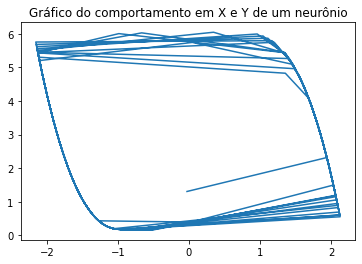

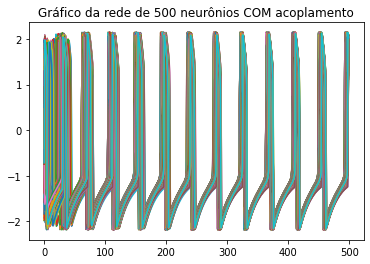

In [ ]:
import matplotlib.pyplot as plt
plt.plot(redeNeural[0].x, redeNeural[0].y)
plt.title('Gráfico do comportamento em X e Y de um neurônio')
plt.show()
for i in range(tamanho):
  plt.plot(range(500), redeNeural[i].x)
plt.title('Gráfico da rede de 500 neurônios COM acoplamento')
plt.show()

O primeiro gráfico apresentado, que demonstra o comportamento de um neurônio da rede ficou dessa forma pois os passos tomados na simulação foram de 500 em 500, de maneira a reduzir significantemente o tempo de execução, que mesmo com esses passos grandes foi de mais de 5 minutos.

Com a força de acoplamento definida e o gráfico obtido, pode-se observar que a sincronização, quase que por completo, se dá de maneira rápida, em torno de 80 unidades de tempo depois do início da simulação.